<a href="https://colab.research.google.com/github/ravishankar75/bits_adl_assignment_01/blob/main/ADL_Assigment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing Standard PCA...
Plotting ROC for Standard PCA...


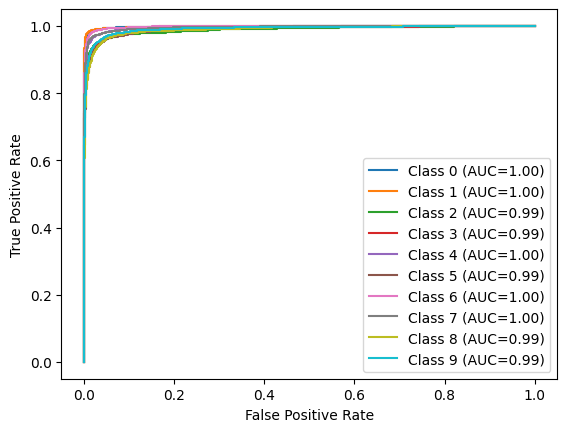

Performing Randomized PCA...
Plotting ROC for Randomized PCA...


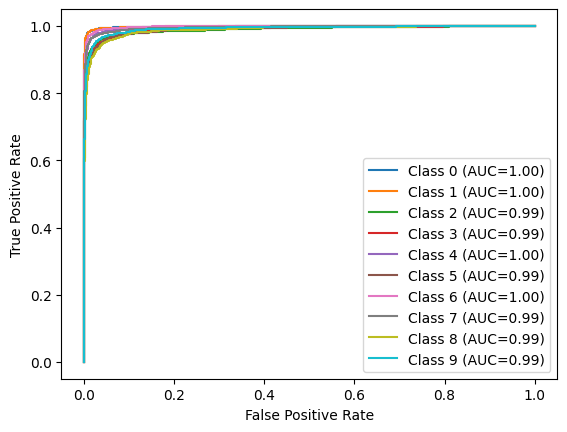

Training Single-Layer Linear Autoencoder...
Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0676
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0150
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0131
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0124
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0119
Training Deep Convolutional Autoencoder...
Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - loss: 0.1019
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 83s 262ms/step - loss: 0.0316
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 83s 268ms/step - loss: 0.0207
Epoch 4/10
192/192 ━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from tensorflow.keras.utils import to_categorical

# Load MNIST Dataset
def load_data():
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist.data / 255.0
    y = mnist.target.astype(int)
    return train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = load_data()

# ---- Task 1 ----
# Standard PCA
def perform_pca(X_train, X_test, energy=0.95):
    pca = PCA(n_components=energy)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return pca, X_train_pca, X_test_pca

# Randomized PCA
def perform_randomized_pca(X_train, X_test, energy=0.95):
    svd = TruncatedSVD(n_components=int(X_train.shape[1] * energy))
    X_train_svd = svd.fit_transform(X_train)
    X_test_svd = svd.transform(X_test)
    return svd, X_train_svd, X_test_svd

# Logistic Regression and ROC Curve
def train_logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    return y_pred

def plot_roc(y_test, y_pred, n_classes=10):
    fpr, tpr, roc_auc = {}, {}, {}
    y_test_bin = to_categorical(y_test, num_classes=n_classes)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# ---- Task 2 ----
# Single Layer Linear Autoencoder
def build_autoencoder(input_dim, latent_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(latent_dim, activation='linear')(input_layer)
    decoded = layers.Dense(input_dim, activation='linear')(encoded)
    autoencoder = models.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# ---- Task 3 ----
# Deep Convolutional Autoencoder
def build_deep_autoencoder(input_shape, latent_dim):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)
    encoded = layers.Dense(latent_dim, activation='relu')(x)
    decoder_input = layers.Reshape((latent_dim,))(encoded)
    decoder = layers.Dense(np.prod(input_shape), activation='sigmoid')(decoder_input)
    decoded = layers.Reshape(input_shape)(decoder)
    autoencoder = models.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# ---- Task 4 ----
# Train MLP on extracted features
def train_mlp(X_train_features, y_train, n_classes=7):
    mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', max_iter=500)
    mlp.fit(X_train_features, y_train)
    return mlp

# Extract features and map to 7-segment display classes
def map_to_segments(y):
    segment_map = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 0}  # Example mapping
    return np.array([segment_map[d] for d in y])

# ---- Main Execution ----

# Task 1: PCA
print("Performing Standard PCA...")
pca, X_train_pca, X_test_pca = perform_pca(X_train, X_test)
y_pred_pca = train_logistic_regression(X_train_pca, X_test_pca, y_train, y_test)
print("Plotting ROC for Standard PCA...")
plot_roc(y_test, y_pred_pca)

print("Performing Randomized PCA...")
svd, X_train_svd, X_test_svd = perform_randomized_pca(X_train, X_test)
y_pred_svd = train_logistic_regression(X_train_svd, X_test_svd, y_train, y_test)
print("Plotting ROC for Randomized PCA...")
plot_roc(y_test, y_pred_svd)

# Task 2: Single-Layer Linear Autoencoder
autoencoder = build_autoencoder(X_train.shape[1], latent_dim=50)
print("Training Single-Layer Linear Autoencoder...")
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True)

# Task 3: Deep Convolutional Autoencoder
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
deep_autoencoder = build_deep_autoencoder((28, 28, 1), latent_dim=50)
print("Training Deep Convolutional Autoencoder...")
deep_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=256)

# Task 4: Deep Convolutional Autoencoder with MLP
print("Extracting Features from Deep Autoencoder...")
encoder = models.Model(deep_autoencoder.input, deep_autoencoder.get_layer("dense").output)
X_train_features = encoder.predict(X_train_reshaped)
X_test_features = encoder.predict(X_test.reshape(-1, 28, 28, 1))

print("Training MLP Classifier on Extracted Features...")
y_train_segments = map_to_segments(y_train)
y_test_segments = map_to_segments(y_test)
mlp = train_mlp(X_train_features, y_train_segments)
print("MLP Training Complete.")
